<a href="https://colab.research.google.com/github/JhonathanOrtiz/OpenCV-python/blob/master/Rotate-and-ColorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Rotate image

Rotate an image could heard some easy, In fact, it's easy OpenCV has functions to rotate images, however, there are image with non-square form. For example, in we rotate a  circle into a windows the circle won't come out of the windows because the circle has a forms almost square, but if have a into the same window definitely comes out because de dintance between the ovoid center and top is not the same between the ovoid center and right-top or left-top.

So we rotate images with difference approach.



In [0]:
import cv2
import imutils
from google.colab import files
from google.colab.patches import cv2_imshow

In [63]:
files.upload()

Saving color_detection_blue_version.jpg to color_detection_blue_version.jpg


{'color_detection_blue_version.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00<\x00\x00\xff\xee\x00\x0eAdobe\x00d\xc0\x00\x00\x00\x01\xff\xdb\x00\x84\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n\x0b\n\n\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x10\x0c\x0e\x0f\x10\x0f\x0e\x0c\x13\x13\x14\x14\x13\x13\x1c\x1b\x1b\x1b\x1c\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x01\x07\x07\x07\r\x0c\r\x18\x10\x10\x18\x1a\x15\x11\x15\x1a\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\xff\xc0\x00\x11\x08\x02O\x03\xe8\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\xc2\x00\x01\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\x01\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x

Original image


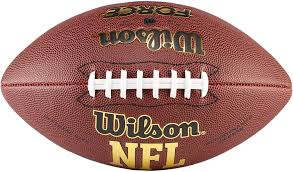


Rotated image


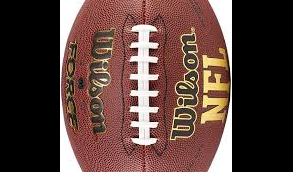


Rotated image with bound funcition


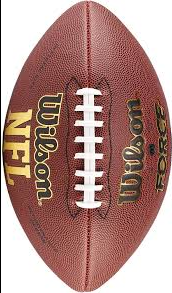

In [24]:
import matplotlib.pyplot as plt
import numpy as np
#Read image from directory, if the image is in the same directory that the .py file only will need the name and extession file
image = cv2.imread('descarga (1).jpg') 

#Cv2 rotate function takes image and angle as parameters
rotated = imutils.rotate(image, 90)
bound_rotated = imutils.rotate_bound(image, 90)
#Display image
print('Original image')
cv2_imshow(image)
print('')
print('Rotated image')
cv2_imshow(rotated)
print('')
print('Rotated image with bound funcition')
cv2_imshow(bound_rotated)



> COLOR DETECTION



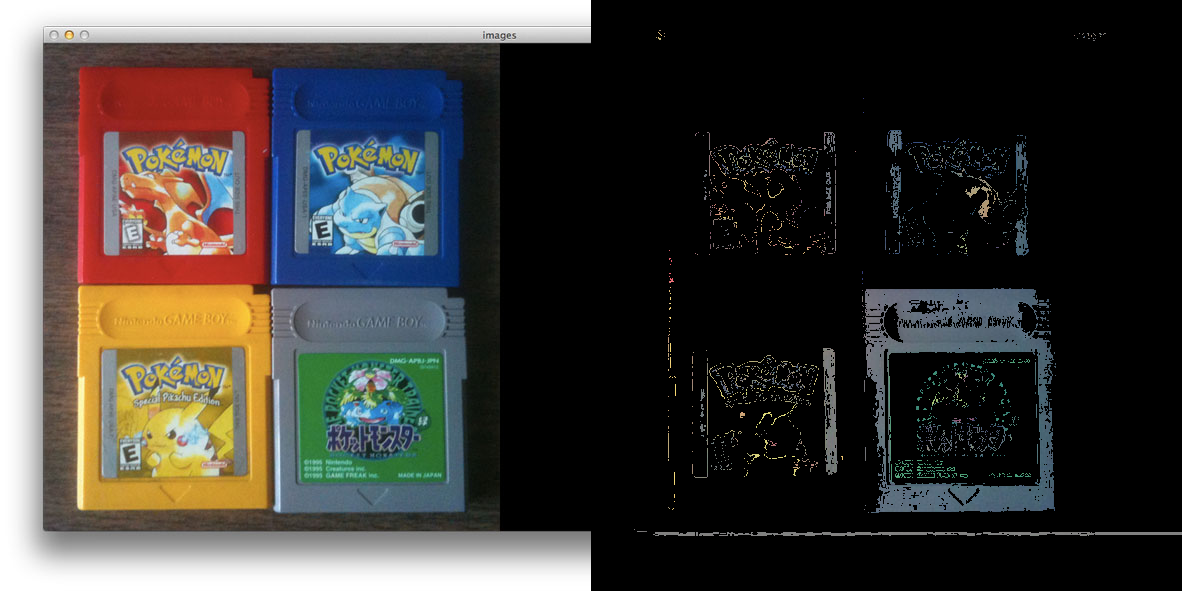

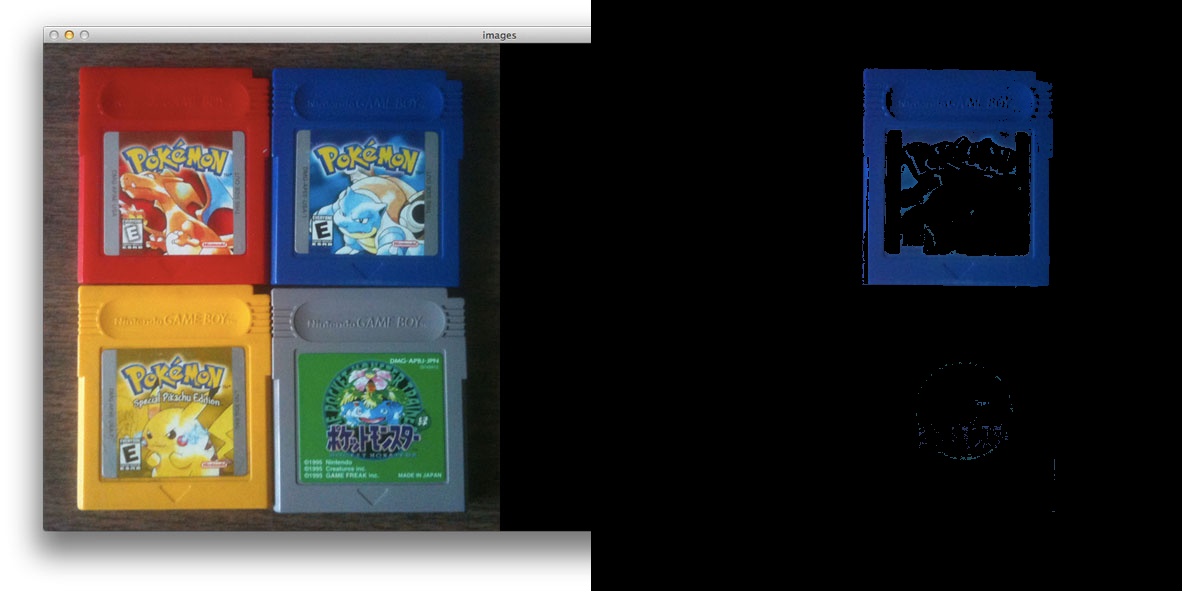

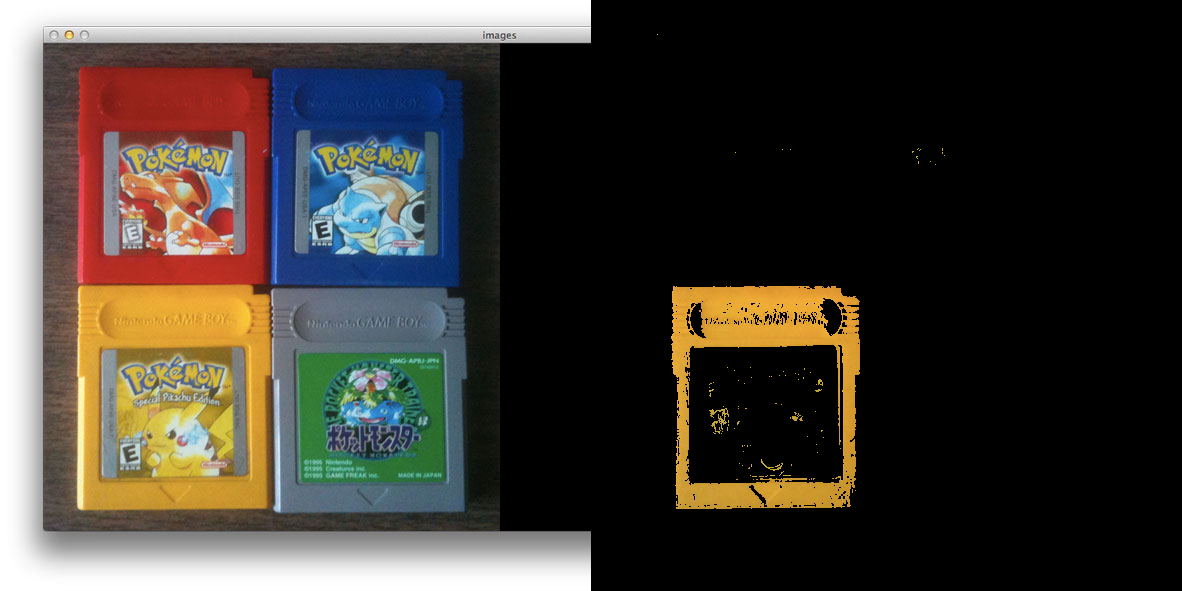

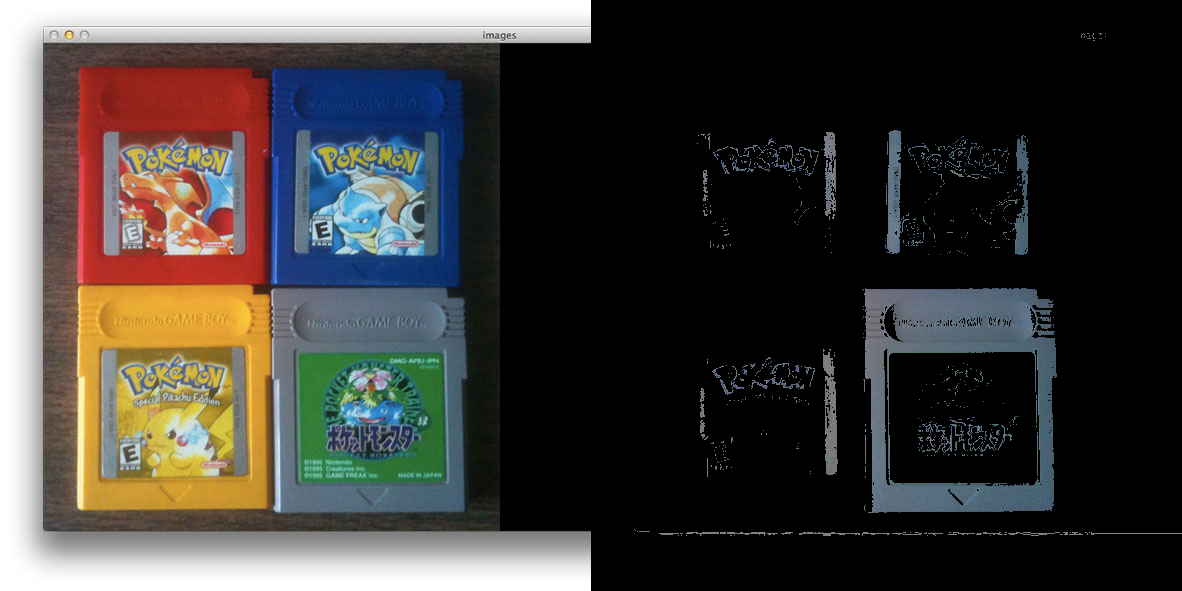

In [69]:
image_2 = cv2.imread('color_detection_blue_version.jpg')

w,_,_ = image_2.shape

image_2 = image_2[:, 0:w]

#Create an boundaries list 

boundaries = [
	([110, 50, 50], [130, 250, 250]),
	([86, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]

for (lower, upper) in boundaries:
  low = np.array(lower, dtype='uint8')
  up = np.array(upper, dtype='uint8')
  
  #Find the color in range from low to up and create mask
  mask = cv2.inRange(image_2, low, up)
  output = cv2.bitwise_and(image_2, image_2, mask=mask)
  final_image = np.hstack([image_2, output])
  cv2_imshow(final_image)
  




So, we define *Boundaring* this a 2-tuple list where each elemet is a list, this list represent ([B, G, R] lower color limit, [B, G, R] upper color limit), for each color that we want detect.

So, we need unpack this list and convert them into a numpy array to create the mask.

This mask is a binary image where if the pixel value is out of bound the value is black and if the pixel value is into the bound the value is white. 

So, we have a mask image where there are yellow (inside the bounds) now is white if we apply bitwise and between mask and original image so the output image will be an image where we will see only the areas where the pixel color is yellow. 


/bin/bash: smi-opencv: command not found
